In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [59]:
df = pd.read_csv("C:/Users/admin/Desktop/201701-citibike-tripdata.csv")

In [60]:
df.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 0:00,2017-01-01 0:11,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 0:00,2017-01-01 0:22,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726676 entries, 0 to 726675
Data columns (total 15 columns):
Trip Duration              726676 non-null int64
Start Time                 726676 non-null object
Stop Time                  726676 non-null object
Start Station ID           726676 non-null int64
Start Station Name         726676 non-null object
Start Station Latitude     726676 non-null float64
Start Station Longitude    726676 non-null float64
End Station ID             726676 non-null int64
End Station Name           726676 non-null object
End Station Latitude       726676 non-null float64
End Station Longitude      726676 non-null float64
Bike ID                    726676 non-null int64
User Type                  723483 non-null object
Birth Year                 697600 non-null float64
Gender                     726676 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 83.2+ MB


In [62]:
df.isnull().sum()

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                   3193
Birth Year                 29076
Gender                         0
dtype: int64

In [63]:
# Drop missing values
df=df.dropna(axis=0)

In [64]:
df.shape

(694412, 15)

In [65]:
df.describe()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,6.944120e+05,694412.000000,694412.000000,694412.000000,694412.000000,694412.000000,694412.000000,694412.000000,694412.000000,694412.000000
mean,7.184607e+02,1209.720795,40.737271,-73.984835,1183.581917,40.736977,-73.985172,21755.157761,1977.094188,1.214986
std,9.438453e+03,1272.334586,0.073943,0.126565,1259.803806,0.073822,0.126571,4199.631649,11.922081,0.420257
min,6.100000e+01,72.000000,0.000000,-74.017134,72.000000,0.000000,-74.033459,14529.000000,1885.000000,0.000000
25%,3.250000e+02,358.000000,40.721101,-73.995299,356.000000,40.720874,-73.995960,17898.000000,1969.000000,1.000000
50%,5.140000e+02,480.000000,40.739355,-73.987216,478.000000,40.739323,-73.987586,21351.000000,1979.000000,1.000000
75%,8.270000e+02,3087.000000,40.755003,-73.976806,3068.000000,40.754666,-73.977061,25820.000000,1987.000000,1.000000
max,5.325688e+06,3446.000000,40.804213,0.000000,3447.000000,40.804213,0.000000,27325.000000,2000.000000,2.000000


In [66]:
# Drop Gender is unknown
df=df.drop(df[df['Gender']==0].index)

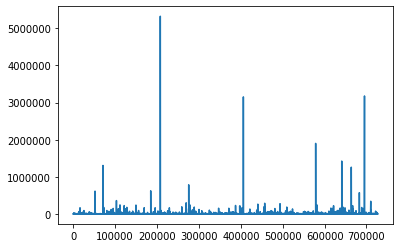

In [67]:
plt.plot(df['Trip Duration'])

In [68]:
# Drop trip duration is less than 4 minutes and greater than 5 hours
df=df.drop(df[(df['Trip Duration'] < 240)|(df['Trip Duration']> 18000)].index)

In [69]:
df.shape

(602350, 15)

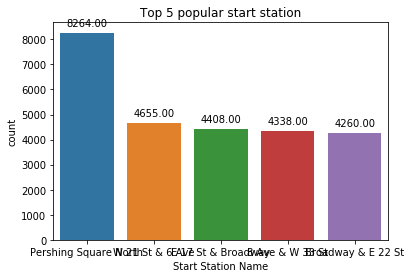

<Figure size 936x648 with 0 Axes>

In [70]:
plot=sns.countplot(df['Start Station Name'],order=df['Start Station Name'].value_counts().iloc[:5].index)
plt.title('Top 5 popular start station')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 13 and height to 9
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.clf()

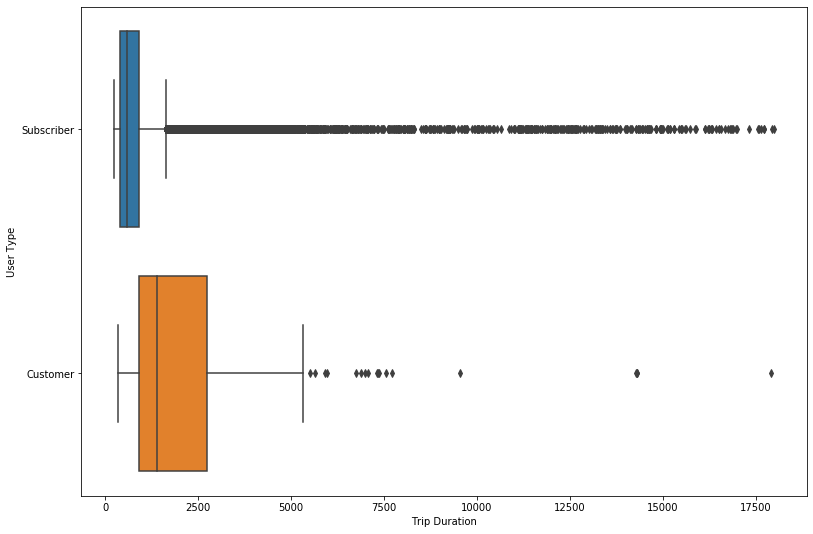

<Figure size 936x648 with 0 Axes>

In [71]:
sns.boxplot(x = "Trip Duration", y = "User Type", data=df)
plt.show()
plt.clf()

In [72]:
df_user_duration = df[['User Type','Trip Duration']]

In [73]:
df_user_duration.groupby(['User Type']).mean()

,Trip Duration
User Type,
Customer,2245.528689
Subscriber,728.413768


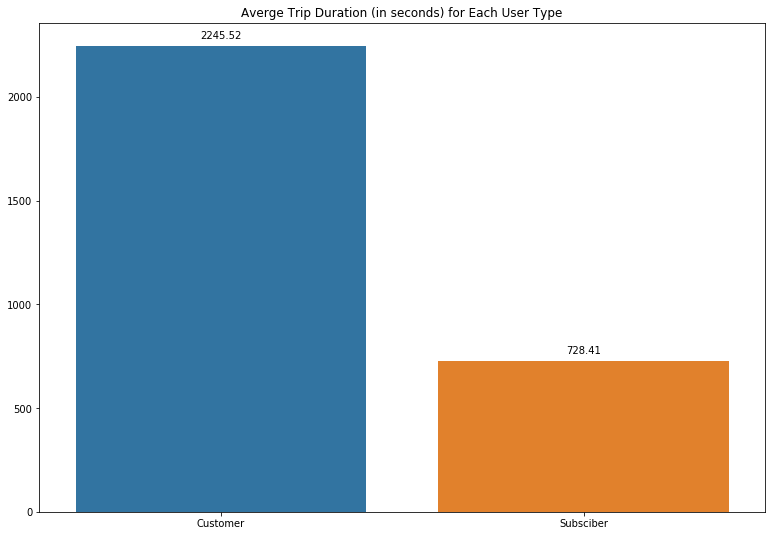

In [74]:
height = [2245.52,728.41]
bars = ('Customer','Subsciber')
y_pos = np.arange(len(bars))
plot=sns.barplot(y_pos, height)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(y_pos, bars)
plt.title('Averge Trip Duration (in seconds) for Each User Type')
plt.show()

In [75]:
df['Trips']=df['Start Station Name']+' - '+df['End Station Name']

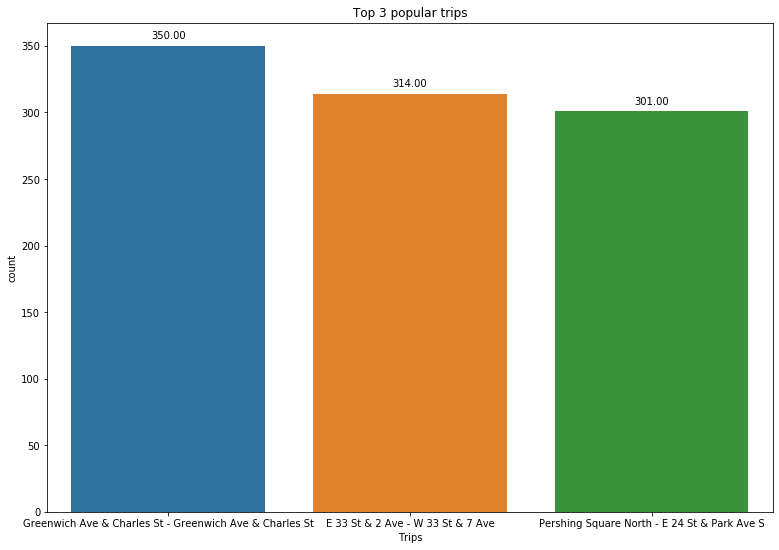

<Figure size 936x648 with 0 Axes>

In [76]:
plot=sns.countplot(df['Trips'],order=df['Trips'].value_counts().iloc[:3].index)
plt.title('Top 3 popular trips')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
plt.clf()

In [77]:
# Calculate distance
def distance(start_lag,start_log,end_lag,end_log):
    # km
    radius = 6371 
    lat1 = np.radians(start_lag)
    lon1 = np.radians(start_log)
    lat2 = np.radians(end_lag)
    lon2 = np.radians(end_log)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = radius * c
    return distance

In [78]:
df['Distance']=distance(df['Start Station Latitude'],df['Start Station Longitude'],df['End Station Latitude'],df['End Station Longitude'])

In [79]:
# Calculate Age
df['Age']=2017-df['Birth Year']

In [80]:
# Drop Age greater than 80
df=df.drop(df[df['Age'] > 80].index)

In [81]:
# Drop distance is 0
df=df.drop(df[df['Distance'] == 0].index)

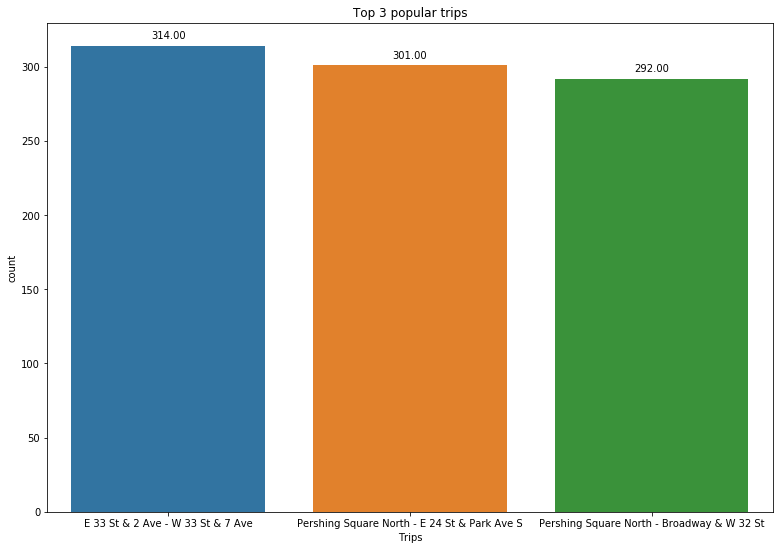

<Figure size 936x648 with 0 Axes>

In [82]:
plot=sns.countplot(df['Trips'],order=df['Trips'].value_counts().iloc[:3].index)
plt.title('Top 3 popular trips')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
plt.clf()

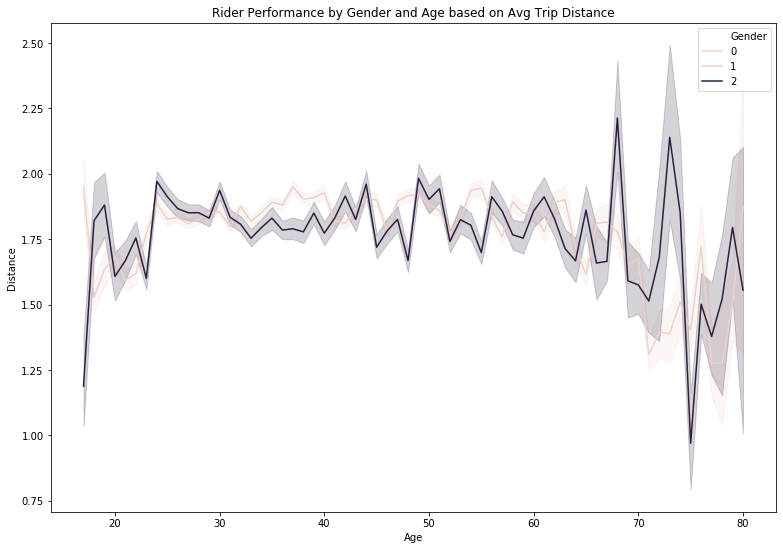

<Figure size 936x648 with 0 Axes>

In [83]:
sns.lineplot(x = "Age", y = "Distance", hue='Gender',data=df)
plt.title('Rider Performance by Gender and Age based on Avg Trip Distance')
plt.show()
plt.clf()

In [84]:
pd.DataFrame(df.groupby(['Gender'])['Distance'].mean())

,Distance
Gender,
1,1.848348
2,1.824767


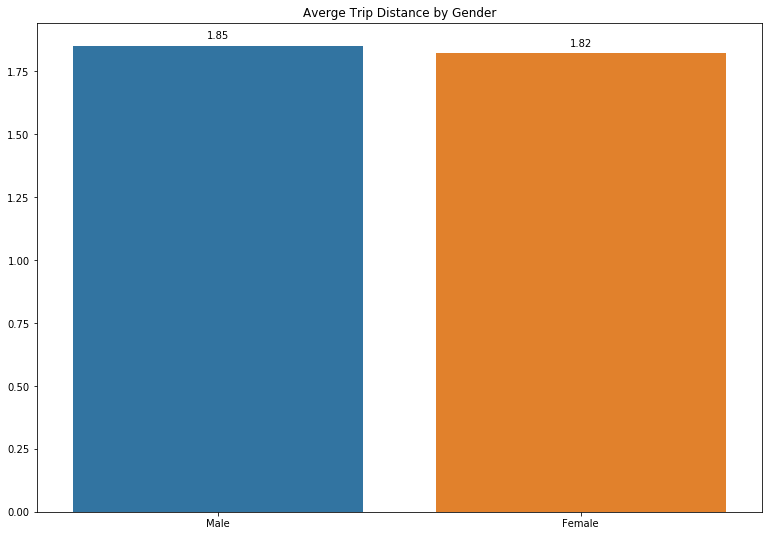

In [56]:
height = [1.85,1.82]
bars = ('Male','Female')
y_pos = np.arange(len(bars))
plot=sns.barplot(y_pos, height)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(y_pos, bars)
plt.title('Averge Trip Distance by Gender')
plt.show()

In [85]:
# Calculate Median Speed 
df['Median Speed']=df['Distance']/(df['Trip Duration']/3600)

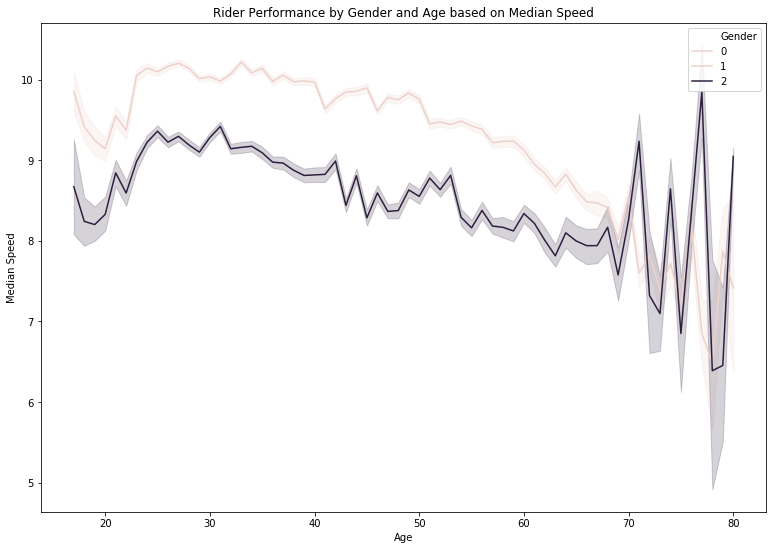

<Figure size 936x648 with 0 Axes>

In [29]:
sns.lineplot(x = "Age", y = "Median Speed", hue='Gender',data=df)
plt.title('Rider Performance by Gender and Age based on Median Speed')
plt.show()
plt.clf()

In [30]:
pd.DataFrame(df.groupby(['Gender'])['Median Speed'].mean())

,Median Speed
Gender,
1,9.788971
2,8.852858


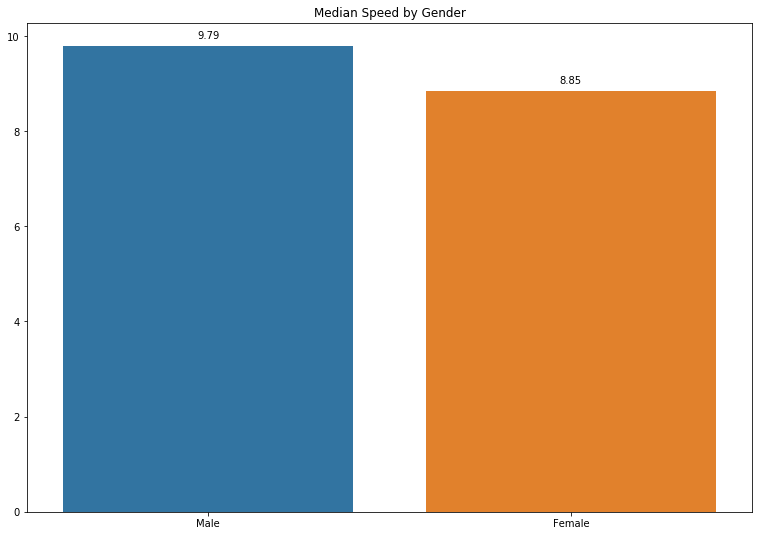

In [57]:
height = [9.79,8.85]
bars = ('Male','Female')
y_pos = np.arange(len(bars))
plot=sns.barplot(y_pos, height)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(y_pos, bars)
plt.title('Median Speed by Gender')
plt.show()

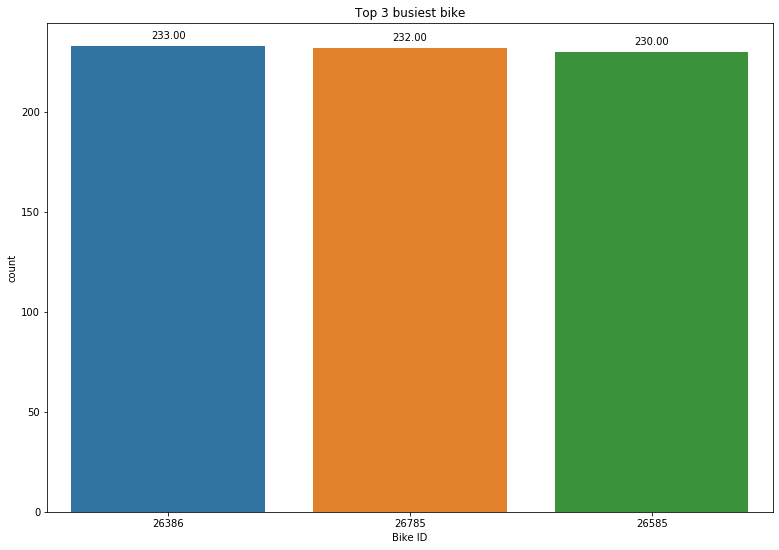

<Figure size 936x648 with 0 Axes>

In [31]:
plot=sns.countplot(df['Bike ID'],order=df['Bike ID'].value_counts().iloc[:3].index)
plt.title('Top 3 busiest bike')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
plt.clf()

In [32]:
df_26386=df.loc[df['Bike ID']==26386]

In [33]:
time=int(sum(df_26386['Trip Duration']/60))
time

2882

In [86]:
# Choose predictors to build the model
df_new=df[['Trip Duration','Distance','User Type','Gender','Age']]

In [87]:
df_new.describe()

,Trip Duration,Distance,Gender,Age
count,595852.000000,595852.000000,595852.000000,595852.000000
mean,722.881252,1.842975,1.227838,40.036476
std,538.423124,1.256756,0.419438,11.851103
min,240.000000,0.036736,1.000000,17.000000
25%,392.000000,1.008087,1.000000,30.000000
50%,571.000000,1.461173,1.000000,38.000000
75%,885.000000,2.253967,1.000000,49.000000
max,17983.000000,14.472733,2.000000,80.000000


In [88]:
# Create dummy variable for Gender 
dummies_gender = pd.get_dummies(df_new['Gender']).rename(columns = lambda x: 'Gender_' + str(x))

In [89]:
# Create dummy variable for User Type 
dummies_usertype = pd.get_dummies(df_new['User Type']).rename(columns = lambda x: 'UserType_' + str(x))

In [90]:
df_new = pd.concat([df_new,dummies_usertype,dummies_usertype], axis=1, sort=False)

In [91]:
df_new.shape

(595852, 9)

In [92]:
df_new=df_new.drop(['User Type','Gender'],axis=1)

In [93]:
# MinMaxScaler to scaler the data
def normalize_data(dataset):
    scaler = preprocessing.MinMaxScaler()
    scaled_dataset = scaler.fit_transform(dataset)
    return scaled_dataset

In [94]:
df_scaled = normalize_data(df_new)

In [95]:
# Split predictors and the target variables
X = df_scaled[:,1:7]
Y = df_scaled[:,0]

In [96]:
# train test split, 40% data as treated as test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=16)

In [97]:
# Build a KNN Regressor model 
def KNNRegressorModel(X_train, Y_train):
    seed = 42
    num_folds = 10
    scoring = "neg_mean_squared_error"
    
    k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19,21])
    param_grid = dict(n_neighbors = k_values)
    model = KNeighborsRegressor()
    kfold = KFold(n_splits = num_folds, random_state = seed)
    
    grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
    grid_result = grid.fit(X_train, Y_train)

    bestK = grid_result.best_params_['n_neighbors']

    KNNmodel = KNeighborsRegressor(n_neighbors =bestK)

    # Train it using X_train
    return KNNmodel.fit(X_train, Y_train)

In [98]:
# Fit the model to test data to predict 
def KNNRegressor(X_train, X_test, Y_train, Y_test):
    
    KNNModelFit = KNNRegressorModel(X_train, Y_train)
    # Run the trained model on rescaled X_test data to predict Y
    pred_scaled = KNNModelFit.predict(X_test)
    
    return pred_scaled

In [ ]:
# Scaled predictions
estimates=KNNRegressor(X_train, X_test, Y_train, Y_test)

In [ ]:
# MSE
mean_squared_error(Y_test, pred_scaled)

In [ ]:
# Denormalized the predictions,transform back to original scaler
testPredictions = np.reshape(estimates, (-1, 1))
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(np.reshape(df_new.loc[:,'tripduration'].values, (-1, 1)))
medianIncomes = scaler.inverse_transform(testPredictions)
final_predictions= scaler.inverse_transform(testPredictions)